In [1]:
# let's import pandas library for data analysis
import pandas as pd

Before starting reading the dataset to estimate salary. This data was collected by [ken Jee](https://github.com/PlayingNumbers/ds_salary_proj/blob/master/README.md)

In [2]:
df = pd.read_csv('glassdoor_jobs.csv')
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [3]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


Let's check if there is any Null value in the dataset 


In [4]:
df.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

Let's check the columns and see if it requires any cleaning or some feature engineering. 

In [5]:
df.describe(include='all')

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
count,956.000000,956,956,956,956.000000,956,956,956,956,956.000000,956,956,956,956,956
unique,NaN,328,417,596,NaN,448,237,235,9,NaN,13,63,25,14,149
top,NaN,Data Scientist,-1,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,NaN,Takeda Pharmaceuticals\n3.7,"New York, NY","New York, NY",1001 to 5000 employees,NaN,Company - Private,Biotech & Pharmaceuticals,Information Technology,Unknown / Non-Applicable,-1
freq,NaN,178,214,4,NaN,14,78,75,177,NaN,532,148,239,299,634
mean,477.500000,NaN,NaN,NaN,3.601255,NaN,NaN,NaN,NaN,1774.605649,NaN,NaN,NaN,NaN,NaN
std,276.117729,NaN,NaN,NaN,1.067619,NaN,NaN,NaN,NaN,598.942517,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN
25%,238.750000,NaN,NaN,NaN,3.300000,NaN,NaN,NaN,NaN,1937.000000,NaN,NaN,NaN,NaN,NaN
50%,477.500000,NaN,NaN,NaN,3.800000,NaN,NaN,NaN,NaN,1992.000000,NaN,NaN,NaN,NaN,NaN
75%,716.250000,NaN,NaN,NaN,4.200000,NaN,NaN,NaN,NaN,2008.000000,NaN,NaN,NaN,NaN,NaN


`Job Title` column seems fine that most of the jobs are Data Scientist but the `Salary Estimate` the most frequent number is `-1` and it doesn't make sense let's clean the the `Salary Estimate` column

In [6]:
df['Salary Estimate'].value_counts()

-1                                           214
$21-$34 Per Hour(Glassdoor est.)               6
$86K-$143K (Glassdoor est.)                    6
$54K-$115K (Glassdoor est.)                    6
$49K-$113K (Glassdoor est.)                    6
$76K-$142K (Glassdoor est.)                    5
$81K-$167K (Glassdoor est.)                    5
$74K-$124K (Glassdoor est.)                    5
$107K-$173K (Glassdoor est.)                   5
$82K-$132K (Glassdoor est.)                    4
$108K-$171K (Glassdoor est.)                   4
$61K-$109K (Glassdoor est.)                    4
$64K-$106K (Glassdoor est.)                    4
$56K-$95K (Glassdoor est.)                     4
$35K-$62K (Glassdoor est.)                     4
$110K-$175K (Glassdoor est.)                   4
$44K-$78K (Glassdoor est.)                     4
$42K-$86K (Glassdoor est.)                     4
$56K-$97K (Glassdoor est.)                     4
$39K-$66K (Glassdoor est.)                     4
$44K-$86K (Glassdoor

After exploring the `Salary Estimate` we found 214 rows of `-1` and some salaries estimate `Per hour` and `Employer Provided` 

first: let remove the rows with `-1`

second: make new columns in the original data frame for hourly and Employer provided 

In [7]:
df_cleaning = df.copy()

In [8]:
df_cleaning = df_cleaning[df_cleaning['Salary Estimate'] != '-1']

In [9]:
df_cleaning['hour'] = df_cleaning['Salary Estimate'].apply(lambda x: 1 if "per hour" in x.lower() else 0)
df_cleaning['employer_provided'] = df_cleaning['Salary Estimate'].apply(lambda x: 1 if "employer provided salary:" in x.lower() else 0)

In [10]:
# create new columns for minimum and maximum salaries 
salary = df_cleaning['Salary Estimate'].apply(lambda x: x.split('(')[0])
remove_k_d = salary.apply(lambda x: x.replace('K','').replace('$',''))
replace_hour_employer = remove_k_d.apply(lambda x: x.lower().replace('per hour','').replace('employer provided salary:',''))
df_cleaning['min_salary'] = replace_hour_employer.apply(lambda x: int(x.split('-')[0]))
df_cleaning['max_salary'] = replace_hour_employer.apply(lambda x: int(x.split('-')[1]))
df_cleaning['avg_salary'] = (df_cleaning['min_salary'] + df_cleaning['max_salary']) / 2

In [11]:
df_cleaning.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hour,employer_provided,min_salary,max_salary,avg_salary
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5


The `Company Name` column shared the same information as the `Rating` column let's remove the rating from the `Company Name` column

In [12]:
df_cleaning['Rating'].describe()

count    742.000000
mean       3.618868
std        0.801210
min       -1.000000
25%        3.300000
50%        3.700000
75%        4.000000
max        5.000000
Name: Rating, dtype: float64

In [13]:
# company name cleaning

df_cleaning['company_txt'] = df_cleaning.apply(lambda x: x['Company Name'] if x['Rating'] <0 else x['Company Name'][:-3], axis=1)

In [14]:
# state field

df_cleaning['job_state'] = df_cleaning['Location'].apply(lambda x: x.split(',')[1])

Check if job `Location` in same `Headquarters` column

In [15]:
df_cleaning['same_state'] = df_cleaning.apply(lambda x: 1 if x.Location == x.Headquarters else 0, axis=1 )

In [16]:
# Age of company

df_cleaning['age'] = df_cleaning['Founded'].apply(lambda x: x if x <1 else 2022 - x)

Let's create columns for the most required tools in a data scientists `Job Description` column such as python, R, Excel, spark 

In [17]:
df_cleaning['python'] = df_cleaning['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df_cleaning['R'] = df_cleaning['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)
df_cleaning['spark'] = df_cleaning['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
df_cleaning['aws'] = df_cleaning['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
df_cleaning['excel'] = df_cleaning['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

In [18]:
df_cleaning = df_cleaning.drop(['Unnamed: 0'], axis=1)

In [19]:
df_cleaning.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hour,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python,R,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research\n,NM,0,49,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System\n,MD,0,38,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4\n,FL,1,12,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL\n,WA,1,57,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions\n,NY,1,24,1,0,0,0,1


In [20]:
df_cleaning['Job Title'].value_counts()

Data Scientist                                                                                        131
Data Engineer                                                                                          53
Senior Data Scientist                                                                                  34
Data Analyst                                                                                           15
Senior Data Engineer                                                                                   14
Senior Data Analyst                                                                                    12
Lead Data Scientist                                                                                     8
Marketing Data Analyst                                                                                  6
Sr. Data Engineer                                                                                       6
Principal Data Scientist                      

Let's simplify the job title to make it clearer

In [21]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

In [22]:
df_cleaning['job_simp'] = df_cleaning['Job Title'].apply(title_simplifier)

In [23]:
df_cleaning['job_simp'].value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [24]:
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [25]:
df_cleaning['seniority'] = df_cleaning['Job Title'].apply(seniority)
df_cleaning['seniority'].value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [26]:
df_cleaning.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hour,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python,R,spark,aws,excel,job_simp,seniority
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research\n,NM,0,49,1,0,0,0,1,data scientist,na
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System\n,MD,0,38,1,0,0,0,0,data scientist,na
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4\n,FL,1,12,1,0,1,0,1,data scientist,na
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL\n,WA,1,57,1,0,0,0,0,data scientist,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions\n,NY,1,24,1,0,0,0,1,data scientist,na


In [27]:
# Remove `\n` from `company_txt` column

df_cleaning['company_txt'] = df_cleaning['company_txt'].apply(lambda x: x.replace('\n',''))

In [28]:
df_cleaning['job_state'].value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 NC              21
 WA              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 IN              10
 WI              10
 UT              10
 AZ               9
 MO               9
 AL               8
 DE               6
 MI               6
 KY               6
 GA               6
 IA               5
 CT               5
 NE               4
 OR               4
 LA               4
 KS               3
 NM               3
 MN               2
 ID               2
 Los Angeles      1
 RI               1
 SC               1
Name: job_state, dtype: int64

In [29]:
df_cleaning['job_state'] = df_cleaning['job_state'].apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')

In [30]:
# check the length of `Job Description`

df_cleaning['desc_len']= df_cleaning['Job Description'].apply(lambda x: len(x))
df_cleaning['desc_len']


0       2536
1       4783
2       3461
3       3883
4       2728
5       3747
6       1786
7       3804
8       1538
9       4574
10      2757
11      3490
12      3934
13      4897
14      3731
15      1889
16      3639
17      4163
18      3512
19      4397
20      2918
21      6909
22      6408
23      2907
25      3760
26      3698
27      4420
28      4900
29      5015
30      3461
31      3883
32      3342
33      5045
34      2327
35      2161
36      1739
37      5000
38      3703
39      3555
40      1739
41      3053
43      1996
44      3833
45      3550
46      9120
48      3213
49      7286
50      3412
51      2682
52      2739
54      2915
55      4244
56      1629
57      4734
58      4448
59      3543
60      4203
61      5020
62      1786
63      3747
65      4804
66      1382
67      2933
68      4945
70      2493
72      1939
73      3081
75      8397
76      2306
77      2291
78      1886
79      2903
80      2653
81      4427
82      2609
83      4295
84      3405

In [31]:
df_cleaning['Competitors'].value_counts()

-1                                                                                              460
Novartis, Baxter, Pfizer                                                                         14
Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory     12
Travelers, Allstate, State Farm                                                                  10
Roche, GlaxoSmithKline, Novartis                                                                  9
Battelle, General Atomics, SAIC                                                                   8
Expedia Group, Orbitz Worldwide, Priceline.com                                                    7
Leidos, CACI International, Booz Allen Hamilton                                                   6
Pitney Bowes                                                                                      6
FLURRY, Chartboost                                                                                6


In [32]:

df_cleaning['num_comp'] = df_cleaning['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [33]:
#hourly wage to annual 

df_cleaning['min_salary'] = df_cleaning.apply(lambda x: x.min_salary*2 if x.hour ==1 else x.min_salary, axis =1)
df_cleaning['max_salary'] = df_cleaning.apply(lambda x: x.max_salary*2 if x.hour ==1 else x.max_salary, axis =1)

In [34]:
df_cleaning[df_cleaning['hour']==1][['hour', 'min_salary','max_salary']]

,hour,min_salary,max_salary
197,1,34,48
209,1,42,68
240,1,36,50
247,1,42,68
257,1,30,50
307,1,34,48
337,1,42,68
427,1,36,50
437,1,48,78
456,1,42,68


In [35]:
df_cleaning.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hour,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python,R,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,0,49,1,0,0,0,1,data scientist,na,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,0,38,1,0,0,0,0,data scientist,na,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL,1,12,1,0,1,0,1,data scientist,na,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,1,57,1,0,0,0,0,data scientist,na,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,1,24,1,0,0,0,1,data scientist,na,2728,3


In [36]:
df_cleaning.describe()

,Rating,Founded,hour,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python,R,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,48.456873,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.900445,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,26.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,61.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,278.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


Let's check the histogram of columns

In [37]:
import matplotlib.pyplot as plt

df_cleaning['age'].hist()

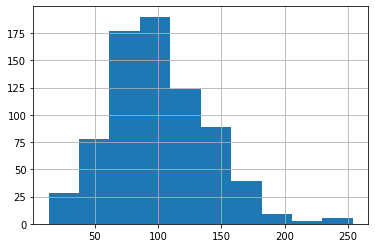

In [38]:
df_cleaning['avg_salary'].hist()

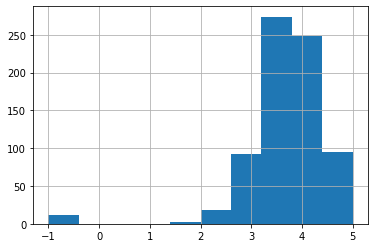

In [39]:
df_cleaning['Rating'].hist()

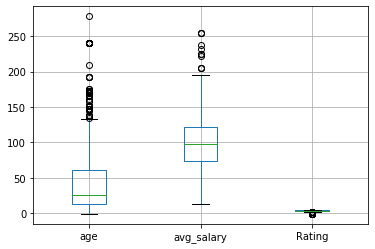

In [40]:
df_cleaning.boxplot(column = ['age','avg_salary','Rating'])

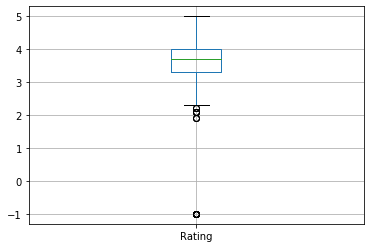

In [41]:
df_cleaning.boxplot(column = 'Rating')

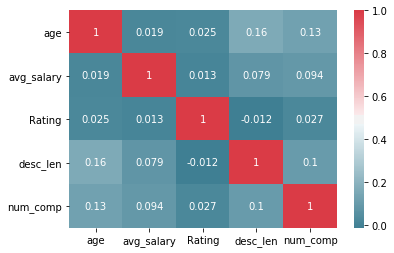

In [42]:
import seaborn as sns
  
# checking correlation using heatmap
#ploting the heatmap for correlation
ax = sns.heatmap(df_cleaning[['age','avg_salary','Rating','desc_len','num_comp']].corr(), annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [43]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df_cleaning.select_dtypes(include=numerics)

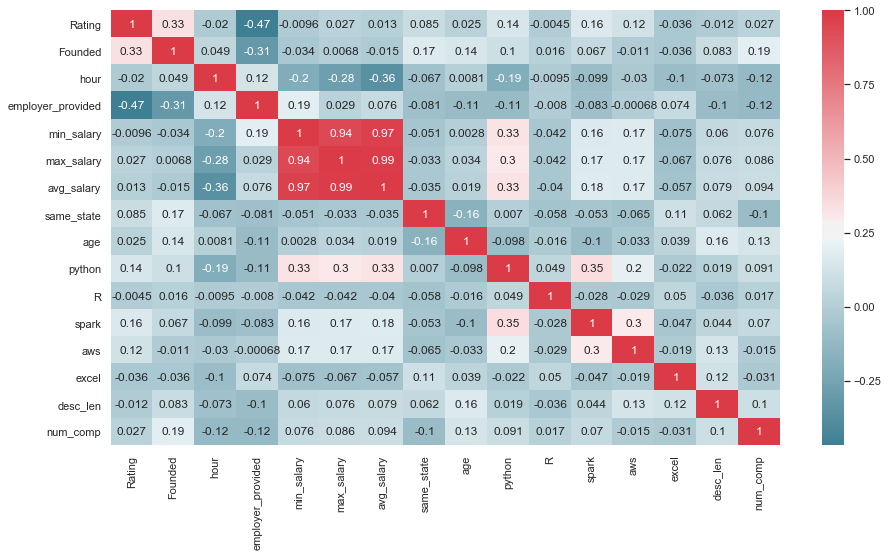

In [44]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.heatmap(newdf.corr(), annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True))

graph for Location: total = 20


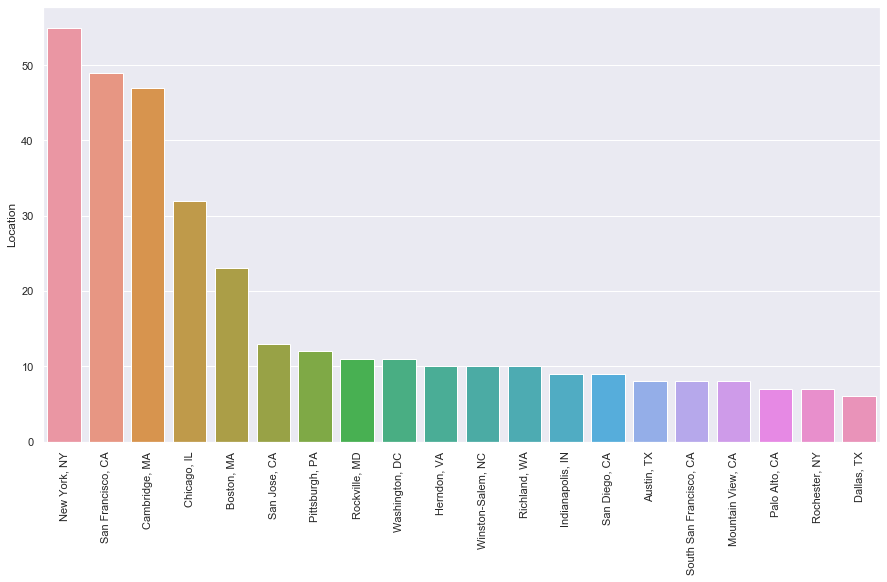

graph for Headquarters: total = 20


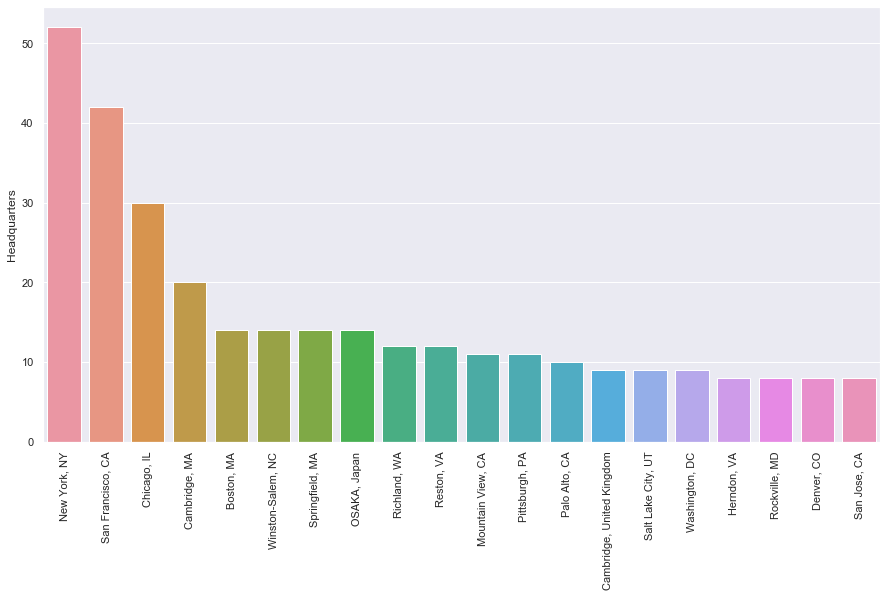

graph for company_txt: total = 20


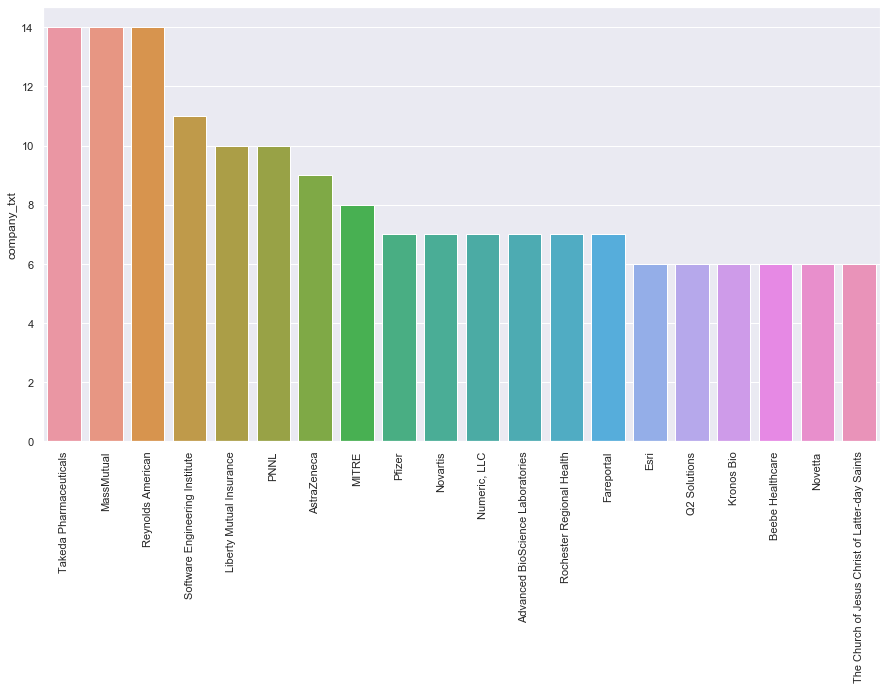

In [45]:
for i in df_cleaning[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cleaning[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [46]:
df_cleaning.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hour', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python', 'R', 'spark',
       'aws', 'excel', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [47]:
pd.pivot_table(df_cleaning, index='job_simp', values='avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
job_simp,
director,168.607143
mle,126.431818
data scientist,117.564516
data engineer,105.403361
na,84.853261
manager,84.022727
analyst,65.857843


In [48]:
pd.pivot_table(df_cleaning, index=['job_simp','seniority'], values='avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [49]:
pd.pivot_table(df_cleaning, index='job_state', values='avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
job_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [50]:
df_cleaning.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hour', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python', 'R', 'spark',
       'aws', 'excel', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [51]:
df_pivots = df_cleaning[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hour', 'employer_provided', 'python', 'R', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]

In [52]:
for i in df_pivots.columns[:-1]:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

Pivot tables show interesting information compared to other columns. On `Rating` pivot table shows that companies with high rates pay more as average salary and `-1` basically is unrated companies. In the `Industry` column Motion Picture Production & Distribution, Financial Analytics & Research and with more revenue paying more. companies with one or two competitors paying more, with having these skills such python, spark and aws. The private companies pay more compared to public and government and other sectors.

In [53]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python', values = 'avg_salary', aggfunc = 'count')

python,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [54]:
# Let's save the current dataset to csv file

df_cleaning.to_csv('salary_data_cleaned.csv', index=False)